<a href="https://colab.research.google.com/github/vishal-burman/PyTorch-Architectures/blob/master/research/modeling_AutoEncoder/test_sample_ConvolutionalAutoEncoder(Nearest_Neighbour_Interpolation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! rm -rf PyTorch-Architectures/
! git clone https://github.com/vishal-burman/PyTorch-Architectures.git
%cd PyTorch-Architectures/research/modeling_AutoEncoder/

In [2]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from model_ae_nni import ConvolutionalAutoEncoder

if torch.cuda.is_available():
  torch.backends.cudnn.deterministic = True

In [3]:
###############
# Settings
###############

# Device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device: ', device)

# Hyperparameters
RANDOM_SEED = 456
LEARNING_RATE = 0.05
NUM_EPOCHS = 10
BATCH_SIZE = 128

# MNIST Dataset
train_dataset = datasets.MNIST(root="data",
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
valid_dataset = datasets.MNIST(root="data",
                               train=False,
                               transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Device:  cpu


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
torch.manual_seed(RANDOM_SEED)
model = ConvolutionalAutoEncoder()
model.to(device)

ConvolutionalAutoEncoder(
  (conv_1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_4): Conv2d(4, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [5]:
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Total Trainable Parameters: ', params)

Total Trainable Parameters:  665


In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [8]:
model.train()
start_time = time.time()
for epoch in range(NUM_EPOCHS):
  for idx, (features, labels) in enumerate(train_loader):
    features = features.to(device)

    logits, decoded = model(features)
    cost = F.binary_cross_entropy_with_logits(logits, features)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # LOGGING
    if idx % 50 == 0:
      print('Epoch: %04d/%04d || Batch: %04d/%04d || Loss: %.2f' % (epoch+1, NUM_EPOCHS, idx, len(train_loader), cost.item()))
  epoch_elapsed_time = (time.time() - start_time) / 60
  print('Epoch Elapsed Time: %.2f min' % (epoch_elapsed_time))
total_training_time = (time.time() - start_time) / 60
print('Total Training Time: %.2f min' % (total_training_time))

Epoch: 0001/0010 || Batch: 0000/0469 || Loss: 0.70
Epoch: 0001/0010 || Batch: 0050/0469 || Loss: 0.18
Epoch: 0001/0010 || Batch: 0100/0469 || Loss: 0.15
Epoch: 0001/0010 || Batch: 0150/0469 || Loss: 0.13
Epoch: 0001/0010 || Batch: 0200/0469 || Loss: 0.12
Epoch: 0001/0010 || Batch: 0250/0469 || Loss: 0.11
Epoch: 0001/0010 || Batch: 0300/0469 || Loss: 0.11
Epoch: 0001/0010 || Batch: 0350/0469 || Loss: 0.11
Epoch: 0001/0010 || Batch: 0400/0469 || Loss: 0.11
Epoch: 0001/0010 || Batch: 0450/0469 || Loss: 0.11
Epoch Elapsed Time: 0.45 min
Epoch: 0002/0010 || Batch: 0000/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0050/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0100/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0150/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0200/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0250/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0300/0469 || Loss: 0.09
Epoch: 0002/0010 || Batch: 0350/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0400/0469 || Loss: 0.10
Ep

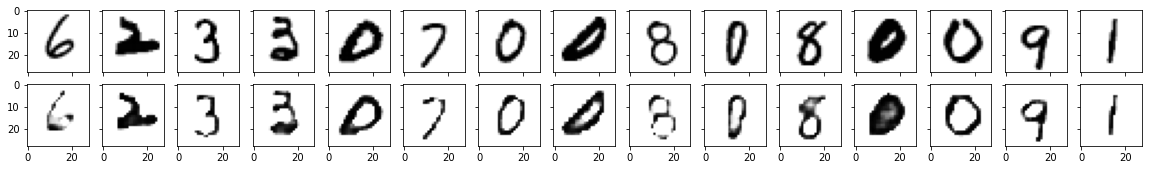

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

##########################
### VISUALIZATION
##########################

n_images = 15
image_width = 28

fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = features[:n_images]
decoded_images = decoded[:n_images]

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, decoded_images]):
        curr_img = img[i].detach().to(torch.device('cpu'))
        ax[i].imshow(curr_img.view((image_width, image_width)), cmap='binary')